In [93]:
import sys
sys.path.append('../')

In [94]:
import os
from PIL import Image, ImageChops
import numpy as np
import matplotlib.pyplot as plt


def trim_white_border_grayscale(image):
    # Create a white background
    bg = Image.new('L', image.size, 240)  # white background for 'L' mode
    diff = ImageChops.difference(image, bg)
    bbox = diff.getbbox()
    if bbox:
        return image.crop(bbox)
    else:
        return image  # Return original if nothing to crop



def process_images(folder_path, max_freq = 4000, n_channels = 400):
    # initialize bins 

    step = max_freq // n_channels
    height, width = 256, 256
    spectrum = np.zeros((height, width, n_channels))

    # Read all images in the folder
    for filename in sorted(os.listdir(folder_path)):
        if filename.endswith('.png'):
            try:
                start, end = map(int, filename.split('.')[0].split('-'))

            except ValueError:
                print(f"Skipping file {filename} due to incorrect format.")
                continue

            img_path = os.path.join(folder_path, filename)
            img = Image.open(img_path)
            img = img.convert('L')

            

            img = trim_white_border_grayscale(img)
            img = img.resize((width, height))
            
            approx_freq = (start + end) / 2
            idx = (int)(approx_freq // step)
            spectrum[:, :, idx] = np.array(img)
                

    return spectrum

    

In [95]:
img = Image.open('/home/sethih1/masque_new/ters_gen/exp_files/spec_35/252-296.png')

In [96]:
img = np.array(img)
img.shape

(614, 704, 3)

In [122]:

folder_path = "/home/sethih1/masque_new/ters_gen/exp_files/spec_34"
spectrums = process_images(folder_path)
channels = spectrums


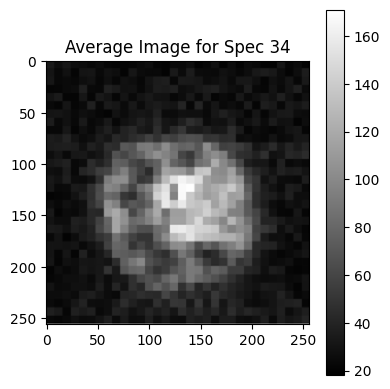

In [123]:
# Compute average image
non_empty_channels = [i for i in range(channels.shape[2]) if np.any(channels[:, :, i] != 0)]
non_empty_channel_images = channels[:, :, non_empty_channels]
average_image= np.mean(non_empty_channel_images, axis=2)

#print(channels.shape)
#spectral_plot(channels)
# Overlay on average channel
plt.figure(figsize=(4, 4))
plt.imshow(average_image, cmap='gray')
plt.colorbar()
plt.title('Average Image for Spec 34')
plt.tight_layout()
plt.show()

In [134]:

folder_path = "/home/sethih1/masque_new/ters_gen/exp_files/spec_35"
spectrums = process_images(folder_path)
channels = spectrums


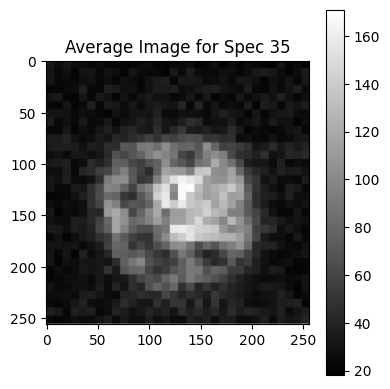

In [135]:
# Compute average image
non_empty_channels = [i for i in range(channels.shape[2]) if np.any(channels[:, :, i] != 0)]
non_empty_channel_images = channels[:, :, non_empty_channels]
average_image= np.mean(non_empty_channel_images, axis=2)

#print(channels.shape)
#spectral_plot(channels)
# Overlay on average channel
plt.figure(figsize=(4, 4))
plt.imshow(average_image, cmap='gray')
plt.colorbar()
plt.title('Average Image for Spec 35')
plt.tight_layout()
plt.show()

In [136]:
from src.transforms import Normalize, MinimumToZero
import torchvision.transforms as transforms
import torch

In [137]:
t_image = transforms.Compose([Normalize(), MinimumToZero()])

In [138]:
spec_tensor = torch.tensor(spectrums, dtype=torch.float32)
spec_tensor = t_image(spec_tensor)

In [139]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = torch.load(
    '/scratch/phys/sin/sethih1/models/all_group_plane_fchk_split_images_ters/hyperopt_old/config2/seg_bs_16_lr_0.0005116967471012849_loss_dice_loss.pt',

    map_location=device
)

/tmp/ipykernel_4038424/783319864.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(


In [140]:
spec_tensor.shape

torch.Size([256, 256, 400])

In [141]:
out = model(spec_tensor.permute(2,0, 1).unsqueeze(0).to(device))

In [142]:
out.shape

torch.Size([1, 1, 256, 256])

Text(0.5, 1.0, 'Model Output for spec_34')

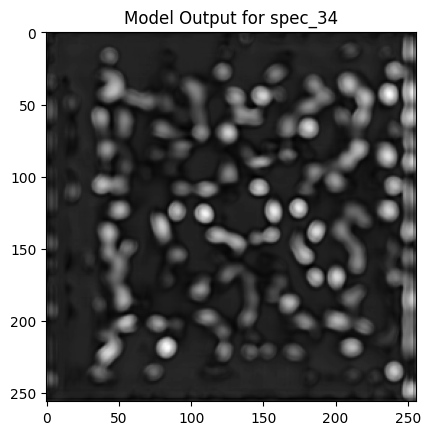

In [133]:
plt.imshow(out.squeeze(0,1).cpu().detach().numpy(), cmap='gray')
plt.title('Model Output for spec_34')

Text(0.5, 1.0, 'Model Output for spec_35')

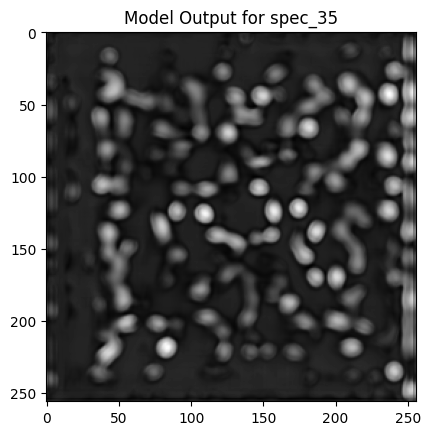

In [143]:
plt.imshow(out.squeeze(0,1).cpu().detach().numpy(), cmap='gray')
plt.title('Model Output for spec_35')